# Imports

In [27]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
plt.style.use(['dark_background'])


# iris

---
## k-means

* apply k-means to the iris dataset and see what happens when you change the value of k
* Which solution, if any, do you find most compelling? 
* Does complexity start to become an issue with this dataset?

Keep in mind that you may find a solution with more than three clusters that nevertheless better tracks the real, trinary outcome. 

For example, two of those clusters may map to a single flower type, while the other two map to the other types.

In [2]:
iris = datasets.load_iris()
# columns = ["sepal_l", "sepal_w", "petal_l", "petal_w"]
X = iris.data
y = iris.target
# y.head()

In [3]:
# scale the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [18]:
# kmeans model
model = KMeans(n_clusters=3)

# fit model
%timeit model.fit(scaled_X)
y_pred = model.predict(scaled_X)

# clustering visualization
pca = PCA(n_components=2).fit_transform(scaled_X)

pca

30.2 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


array([[ 1.14986620e+00,  9.39782462e-01],
       [ 3.22566361e+00,  1.45110505e+00],
       [ 3.13197261e+00, -6.33778550e-01],
       [-4.52171880e-01, -1.44430073e+00],
       [-2.26999539e+00,  3.56836009e-01],
       [-2.19525334e+00, -3.43908767e-01],
       [ 1.97000243e+00,  1.71918365e+00],
       [-7.17462607e-01,  8.90198757e-01],
       [ 1.38380222e+00, -1.38415336e-02],
       [ 2.70189334e+00, -9.54868727e-01],
       [ 2.10461688e-02, -1.11383945e+00],
       [-6.80053328e-01,  1.86567710e+00],
       [ 1.43505241e+00,  1.12603458e-01],
       [-2.02391397e+00, -1.18742621e+00],
       [-5.02815918e-01,  1.49350546e-01],
       [-1.35080660e+00, -4.15026285e-01],
       [-4.68536905e-01, -1.84264481e+00],
       [-1.02195065e+00, -3.32436162e-01],
       [-1.77783975e+00,  5.91942667e-01],
       [-2.21995141e+00, -2.02570202e-01],
       [ 1.30216408e-01, -4.15918873e-01],
       [-1.44934985e+00,  2.96989134e+00],
       [-5.25136793e-01,  4.65954580e-01],
       [ 8.

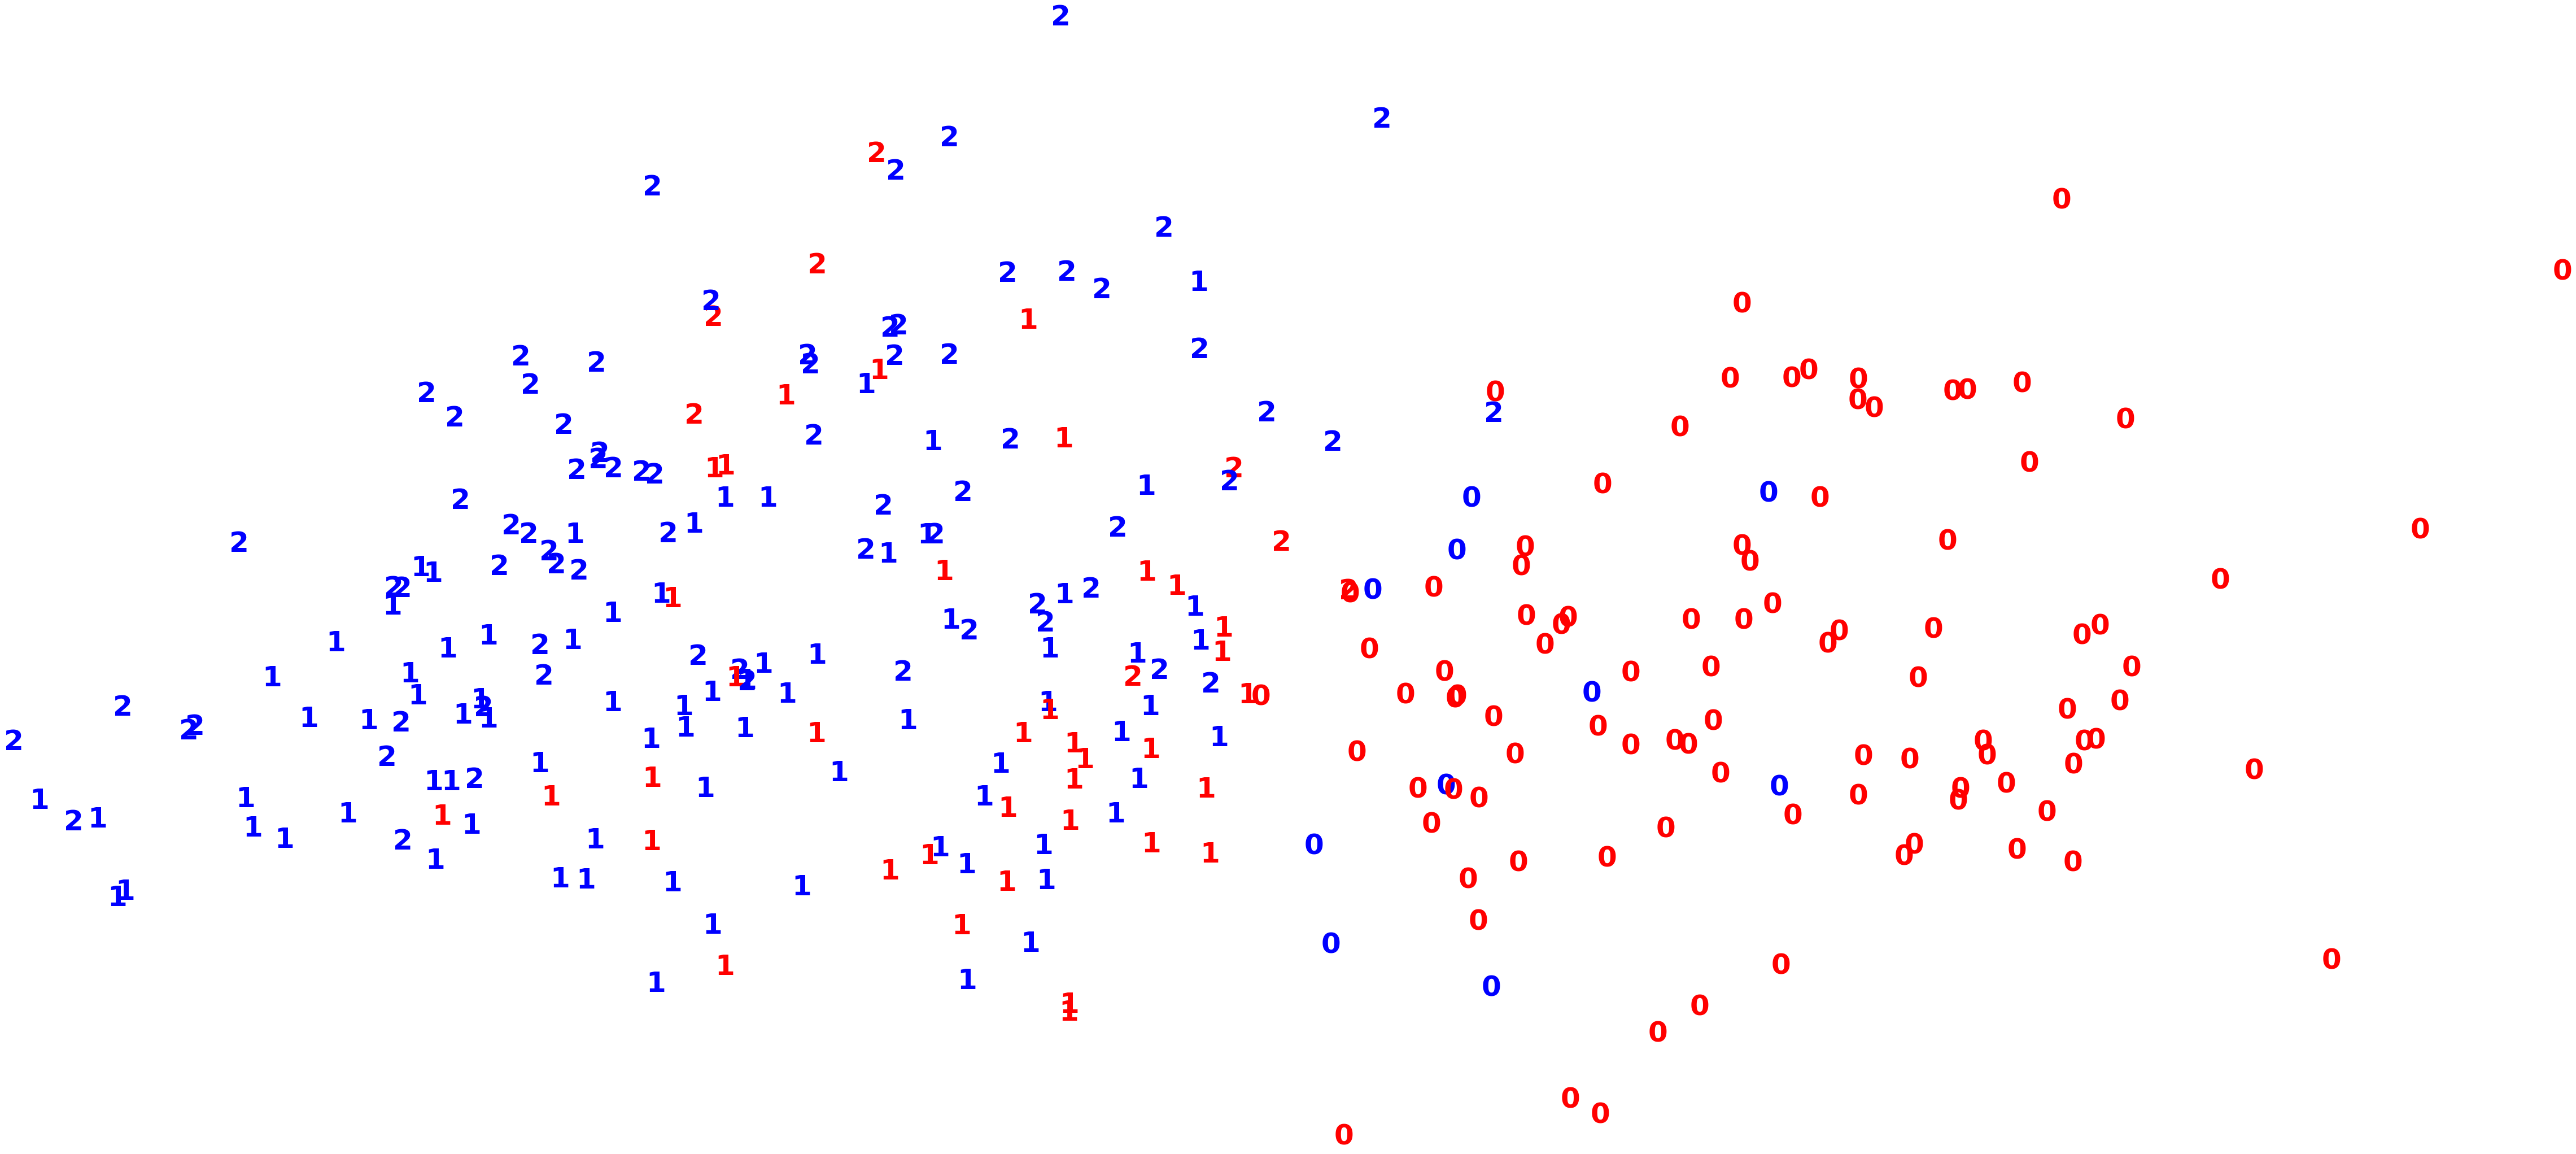

In [19]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0], 
        pca[i, 1],
        str(y_pred[i]),
        color=colours[y[i]],
        fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

---
## evaluating clusters

---
* Get the silhouette coefficient of the two-cluster k-means solution. 

You'll notice that the silhouette coefficient will turn out to be greater than the one above, where the cluster number is three. You know that the iris dataset consists of three different clusters. So the silhouette score of the solution where the number of clusters is equal to the correct number of classes is actually lower than the silhouette score of the solution where the number of clusters is different from the correct number of classes. 

* Why is this?

In [5]:
labels3 = KMeans(n_clusters=3).fit_predict(scaled_X)
labels2 = KMeans(n_clusters=2).fit_predict(scaled_X)

print(metrics.silhouette_score(scaled_X, labels2, metric='euclidean'))
print(metrics.silhouette_score(scaled_X, labels3, metric='euclidean'))

0.5817500491982808
0.45994823920518635


> The the distance between the cluster means is larger for the 3 cluster model which is the dividing number in the silhouette coefficient formula.

---
---
# heart disease

---
## k-means

In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.
http://archive.ics.uci.edu/ml/datasets/Heart+Disease

Load the dataset from Thinkful's database. To connect to the database, use these credentials:

 postgres_user = 'dsbc_student'
 
 postgres_pw = '7*.8G9QH21'
 
 postgres_host = '142.93.121.174'
 
 postgres_port = '5432'
 
 postgres_db = 'heartdisease'

---
## evaluating clusters

---
In this assignment, you'll continue working with the heart disease dataset.

In [15]:
# server credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'
conn_str = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'
query = '''
SELECT *
FROM heartdisease
'''

# reload data
heartdisease_df = pd.read_sql_query(query, con=conn_str)

---
1. Split the data randomly into two. Apply k-means using two, three, and four as the number of clusters, as you did when you were exploring consistency earlier in this checkpoint. 

In [16]:
# Make sure the number of rows divides evenly into four samples.
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2
df = heartdisease_df.iloc[:rows, :]

# reformat the df
X = df.iloc[:, :13]
y = df.iloc[:, 13]
# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)
# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

# normalize the df
scaled_X = StandardScaler().fit_transform(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# pca for clustering visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)

# split data randomly into two
X_1, X_2, X_pca1, X_pca2 = train_test_split(scaled_X, X_pca, test_size=0.5, random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_1, X_pca1),
    (X_2, X_pca2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

* Assess the consistency of the solutions using visualization. Which one seems to be the best?

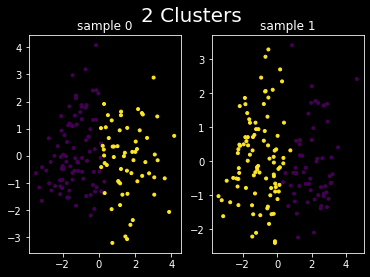

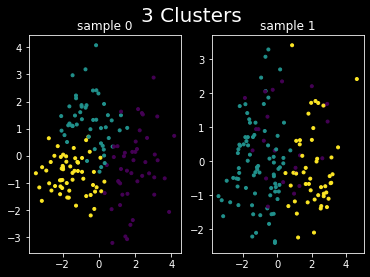

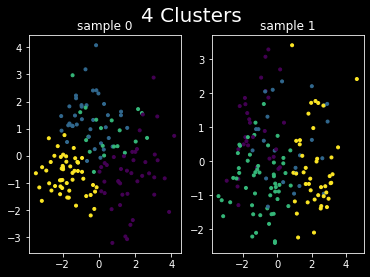

In [81]:
colors = 'rbg'
for cluster in range(2,5):
    fig, ax = plt.subplots(1,2)
    # plot for each sample
    for i in range(2):
        # PCA-created features.
        x_sample = ypred[f'pca_f1_sample{i}']
        y_sample = ypred[f'pca_f2_sample{i}']
        
        # Cluster assignments.
        c = ypred[f'clust{cluster}_sample{i}']
        

        # Assign the subplot to its place on the grid.
        ax[i].scatter(x_sample, y_sample, c=c, marker='.')
        ax[i].set_title(f'sample {i}')
        ax[i].set_xlim()
        ax[i].set_ylim()
        
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.show()

> the 2 cluster model seems to have the best consistency across samples

---
2. Apply k-means on the whole dataset by setting k equal to 2, 3, and 4. Get the ARI score for each of them. Which model is best?

In [82]:
km2 = KMeans(n_clusters=2, random_state=42).fit_predict(scaled_X)
km3 = KMeans(n_clusters=3, random_state=42).fit_predict(scaled_X)
km4 = KMeans(n_clusters=4, random_state=42).fit_predict(scaled_X)

print("2 cluster ARI: {}".format(
    metrics.adjusted_rand_score(y, km2)))
print("3 cluster ARI: {}".format(
    metrics.adjusted_rand_score(y, km3)))
print("4 cluster ARI: {}".format(
    metrics.adjusted_rand_score(y, km4)))

2 cluster ARI: 0.43661540614807665
3 cluster ARI: 0.27992514499139165
4 cluster ARI: 0.18979924956775318


> The 2 cluster has the highest ARI & would be the best model

---
3. Apply k-means on the whole dataset by setting k equal to 2, 3, and 4. Get the silhouette coefficient for each of them. Which model is best?

In [83]:
sil2 = metrics.silhouette_score(scaled_X, km2, metric='euclidean')
sil3 = metrics.silhouette_score(scaled_X, km3, metric='euclidean')
sil4 = metrics.silhouette_score(scaled_X, km4, metric='euclidean')

print(f"2 cluster silhouette score: {sil2}")
print(f"3 cluster silhouette score: {sil3}")
print(f"4 cluster silhouette score: {sil4}")

2 cluster silhouette score: 0.17440650461256255
3 cluster silhouette score: 0.12929390991750117
4 cluster silhouette score: 0.13234499420576923


> the 2 cluster silhouette score is the highest & is the best model